<a href="https://colab.research.google.com/github/EskelinenElias/ADAML-project1/blob/main/ADAML_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADAML Project 1 Intermediary submission 1

Elias Eskelinen, Vili Niemelä, Matti Aalto

## Instructions


In this week, you will be getting familiar with the data. At the end of the week, the goal is to have clean data, efficiently imported into your workspace, and visualized, and to understand what the data is used for. The PDF you will return will have max. 2 pages.

Breakdown of the points:

0.25p   
- an established communication channel and appropriate strategy for code sharing.

0.25p   
- data correctly imported into appropriate matrices completely: observations as rows, variables (predictors) as columns.

0.5p     
- identification of challenges of the data: for example: time series not synchronized, missing values in data, extra variables, variables with unknown physical meanings, etc.

0.5p     
- a visualization and comment on the dataset: variable distribution, number of observations, type of measurements (time series or not time series)

3p         
- exploratory data analysis with PCA: explain variable correlations and visualize the PCs using biplots, loading plots; (! only on the X matrix - we are not looking at the response variable now)

0.5p     
- identification of pretreatment steps, and a plan on how to do data pretreatment

## Loading the data

In [11]:
import kagglehub
import os

# Fetch the latest version of the dataset from kaggle
data_dir = kagglehub.dataset_download("edumagalhaes/quality-prediction-in-a-mining-process")

data_path = os.path.join(data_dir, os.listdir(data_dir)[0])
print("Path to dataset files:", data_path)

Path to dataset files: /Users/eliaseskelinen/.cache/kagglehub/datasets/edumagalhaes/quality-prediction-in-a-mining-process/versions/1/MiningProcess_Flotation_Plant_Database.csv


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(data_path)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Format date column
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

# Format other columns
for column in data.columns[1:]:

    data[column] = data[column].str.replace(',', '.')
    data[column] = data[column].astype(float)

resampled_data = data.groupby("date").mean(numeric_only=True).reset_index()

resampled_data


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
1,2017-03-10 02:00:00,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2,2017-03-10 03:00:00,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
3,2017-03-10 04:00:00,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
4,2017-03-10 05:00:00,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,2017-09-09 19:00:00,49.75,23.20,3327.047776,497.211189,380.847200,9.176166,1.660871,301.565561,300.169133,...,298.736661,397.781583,498.753311,403.858956,398.930467,502.971728,399.468911,400.559511,65.05,1.65
4093,2017-09-09 20:00:00,49.75,23.20,4225.800333,508.963856,381.112889,9.387541,1.691996,300.050172,299.967839,...,303.599269,399.928567,499.648950,399.208611,399.967122,501.624533,398.905006,400.486233,64.83,1.71
4094,2017-09-09 21:00:00,49.75,23.20,2808.214692,517.748822,381.064411,9.771277,1.735647,299.814289,299.801561,...,309.875439,399.961433,500.484917,471.827489,399.931033,500.223311,401.899806,400.556333,64.29,1.80
4095,2017-09-09 22:00:00,49.75,23.20,3191.497672,492.511228,380.445006,9.782121,1.716644,300.122756,299.679472,...,305.254558,399.601383,498.614494,836.277192,400.455389,500.406239,402.703283,401.769072,64.25,1.96


In [14]:
count_data = data.groupby("date").count()
print( "Minimum amount of observations per timestamp: ", count_data.iloc[:,0].min() )
print( "Maximum number of observations per timestamp: ", count_data.iloc[:,0].max() )

print( data.groupby("date").count() )

Minimum amount of observations per timestamp:  174
Maximum number of observations per timestamp:  180
                     % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00          174            174          174         174   
2017-03-10 02:00:00          180            180          180         180   
2017-03-10 03:00:00          180            180          180         180   
2017-03-10 04:00:00          180            180          180         180   
2017-03-10 05:00:00          180            180          180         180   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00          180            180          180         180   
2017-09-09 20:00:00          180            180          180         180   
2017-09-09 21:00:00          180            180          180         180   
2017-09-09 22:00:00          180            180          180  

In [15]:
data_per_h = data['date'].value_counts()

diff_from_180 = data_per_h[data_per_h != 180]
print(diff_from_180)

date
2017-04-10 00:00:00    179
2017-03-10 01:00:00    174
Name: count, dtype: int64


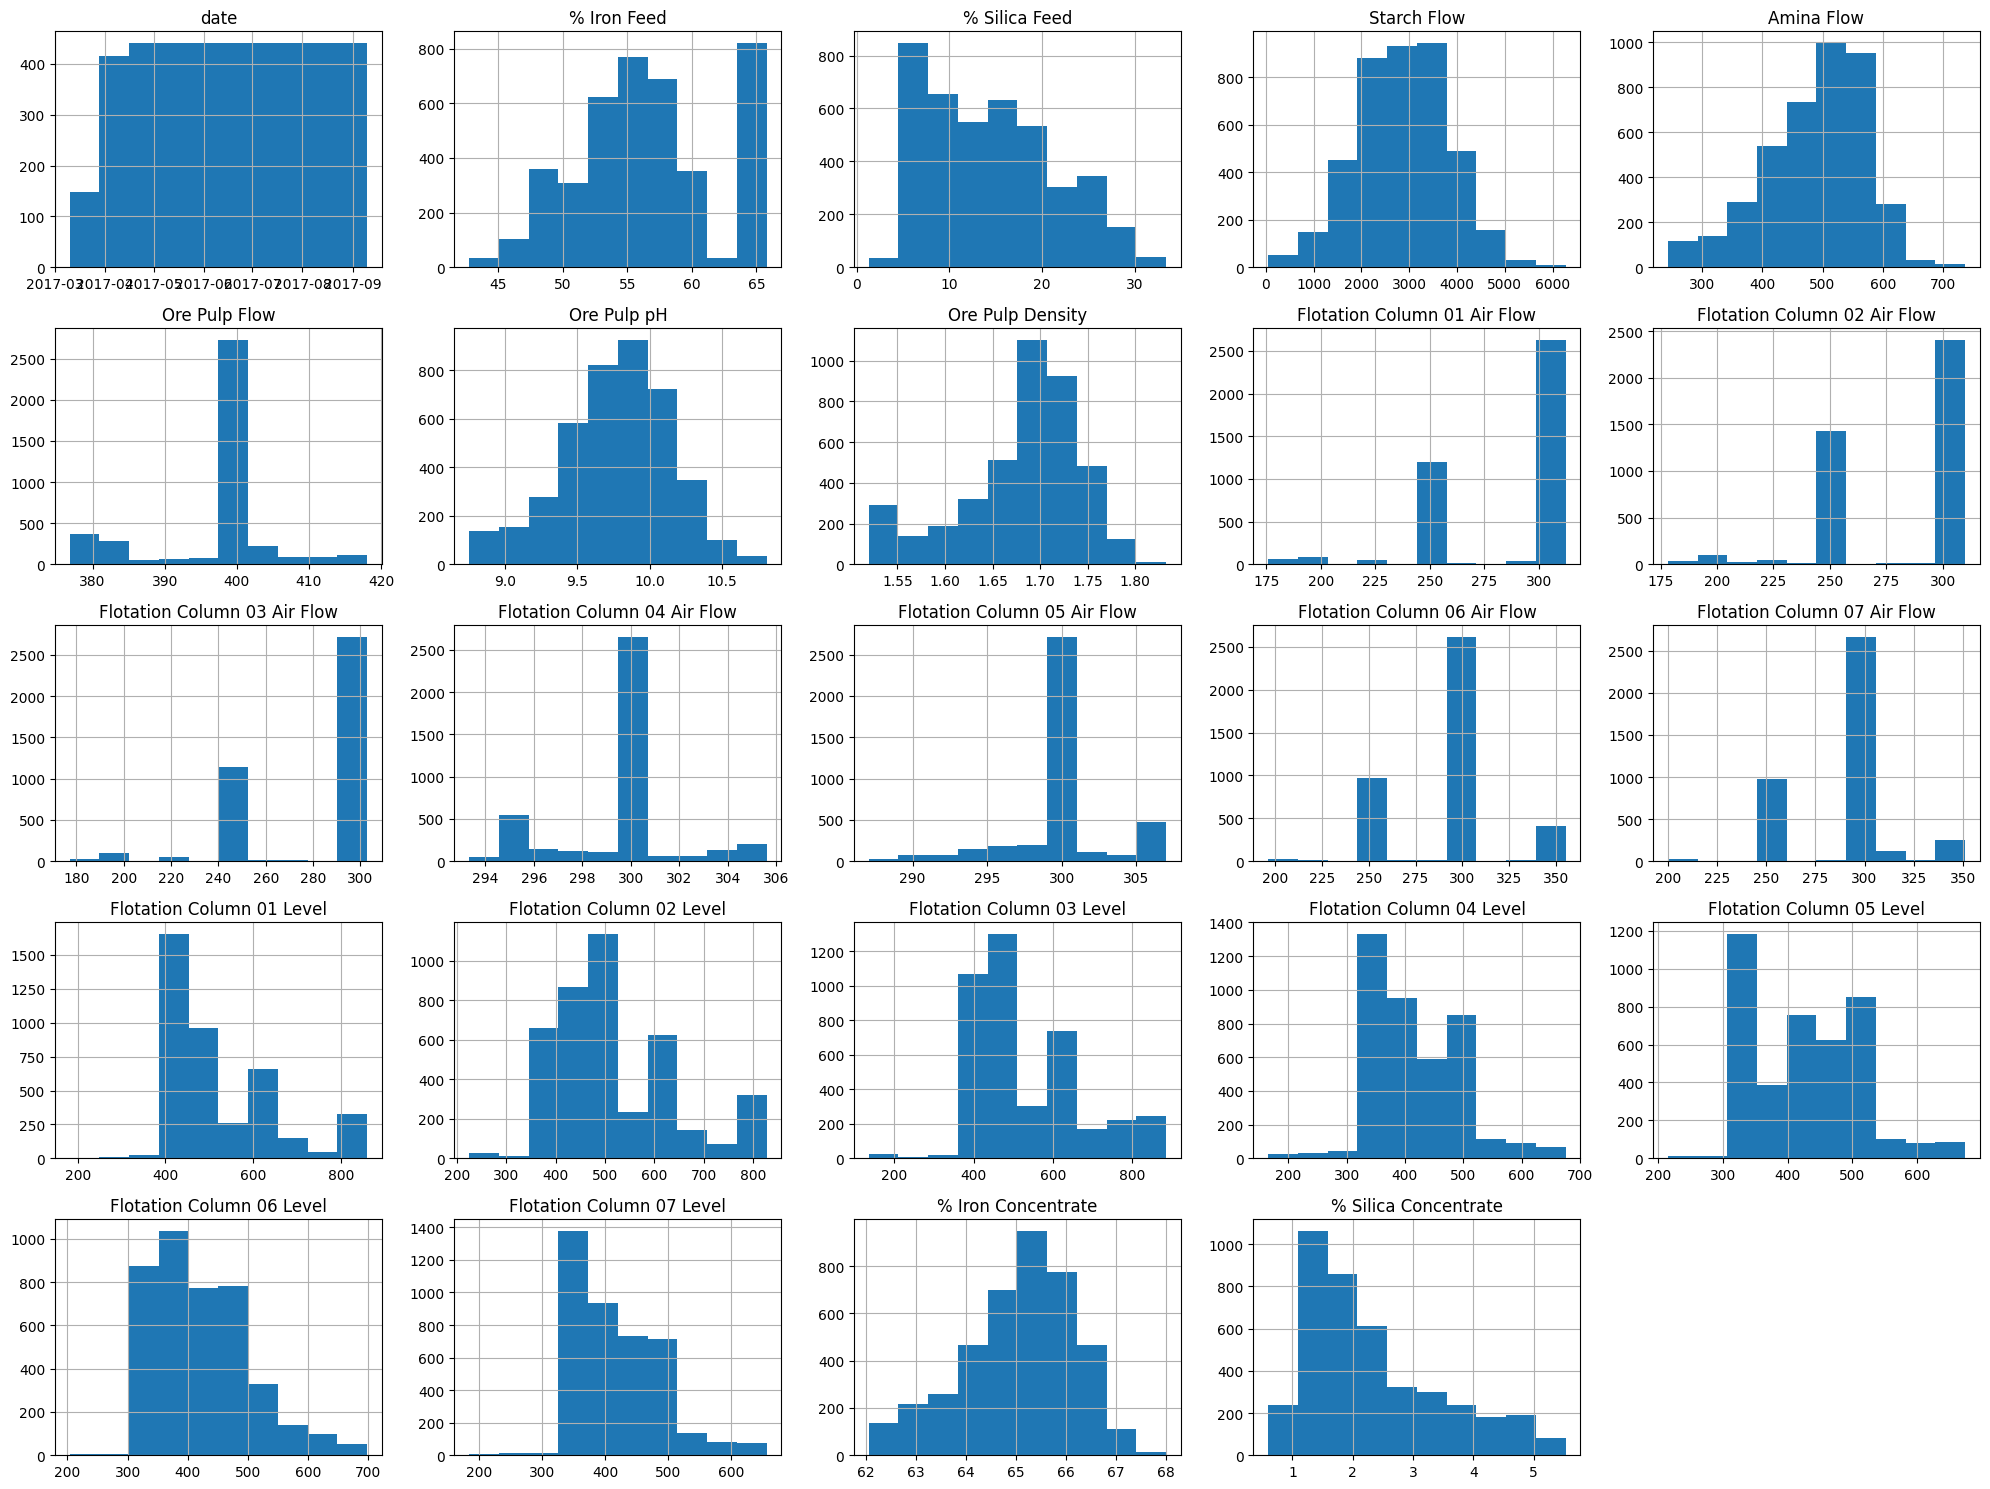

In [16]:
resampled_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

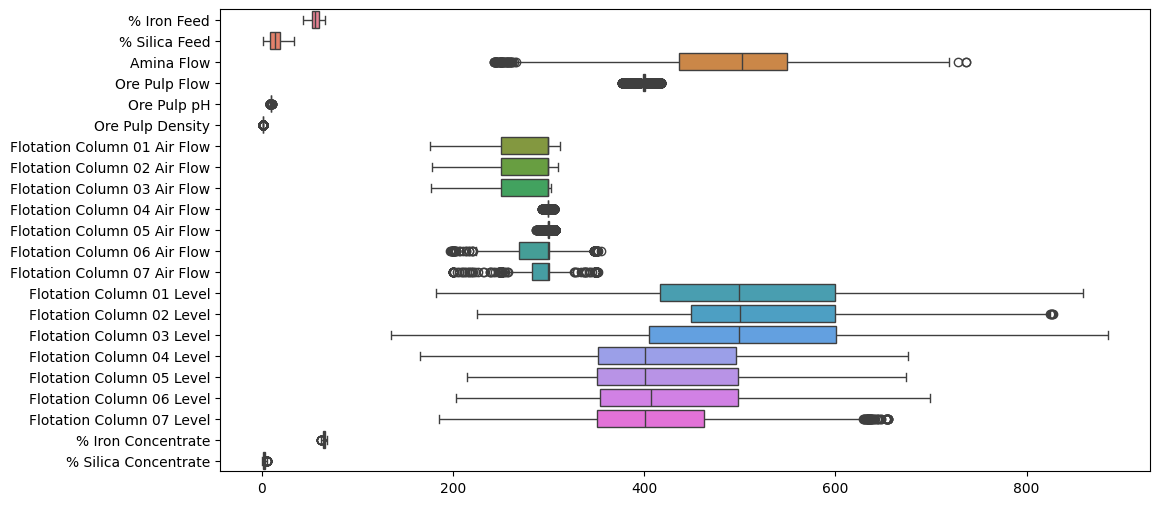

In [17]:
import seaborn as sns

filtered_columns = data.columns[data.columns != "Starch Flow"]
resampled_filtered = resampled_data[filtered_columns]

plt.figure(figsize=(12, 6))
sns.boxplot(data=resampled_filtered, orient="h")

plt.show()

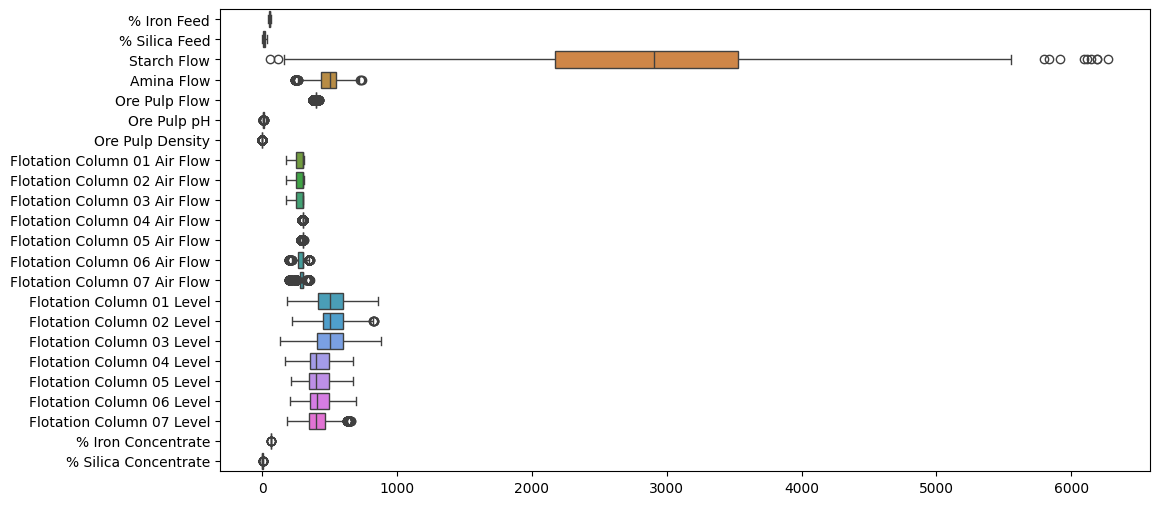

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=resampled_data, orient="h")

plt.show()

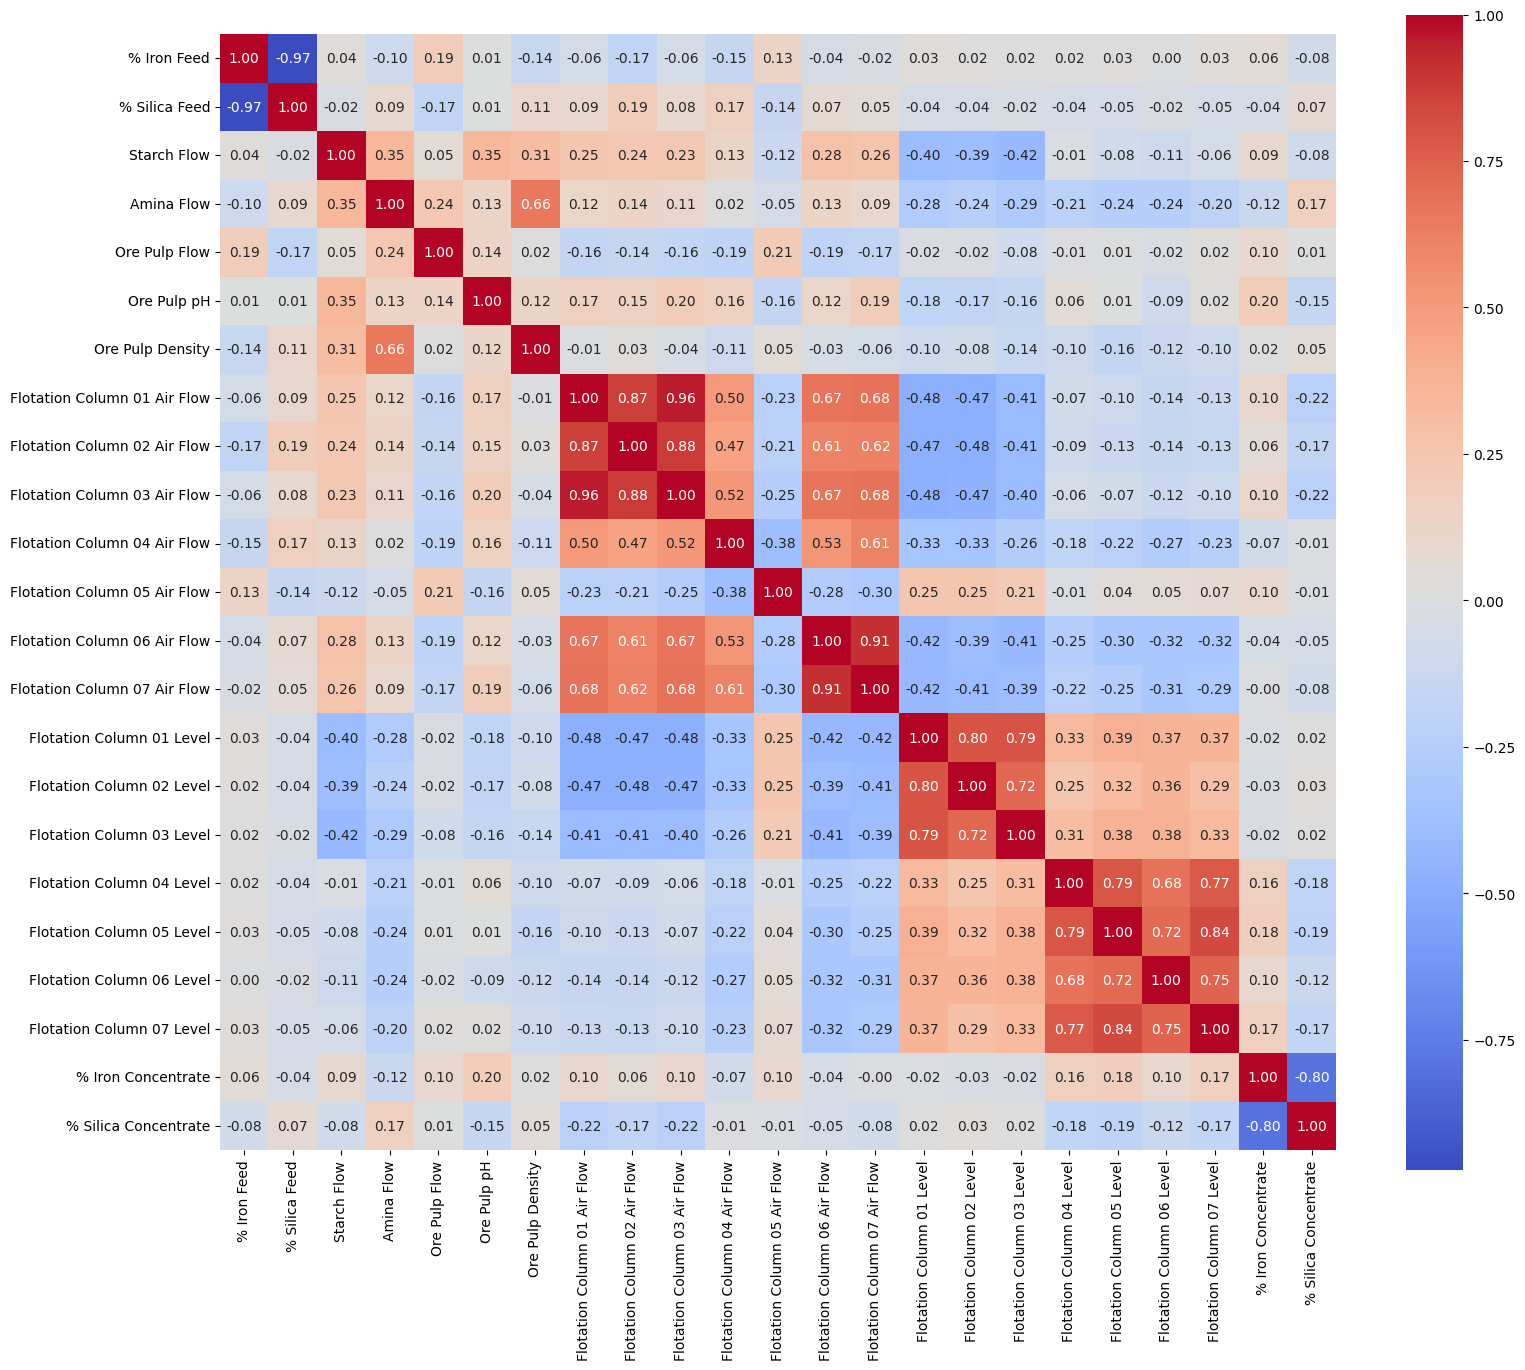

In [19]:
data_corr = resampled_data.iloc[:,1:].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

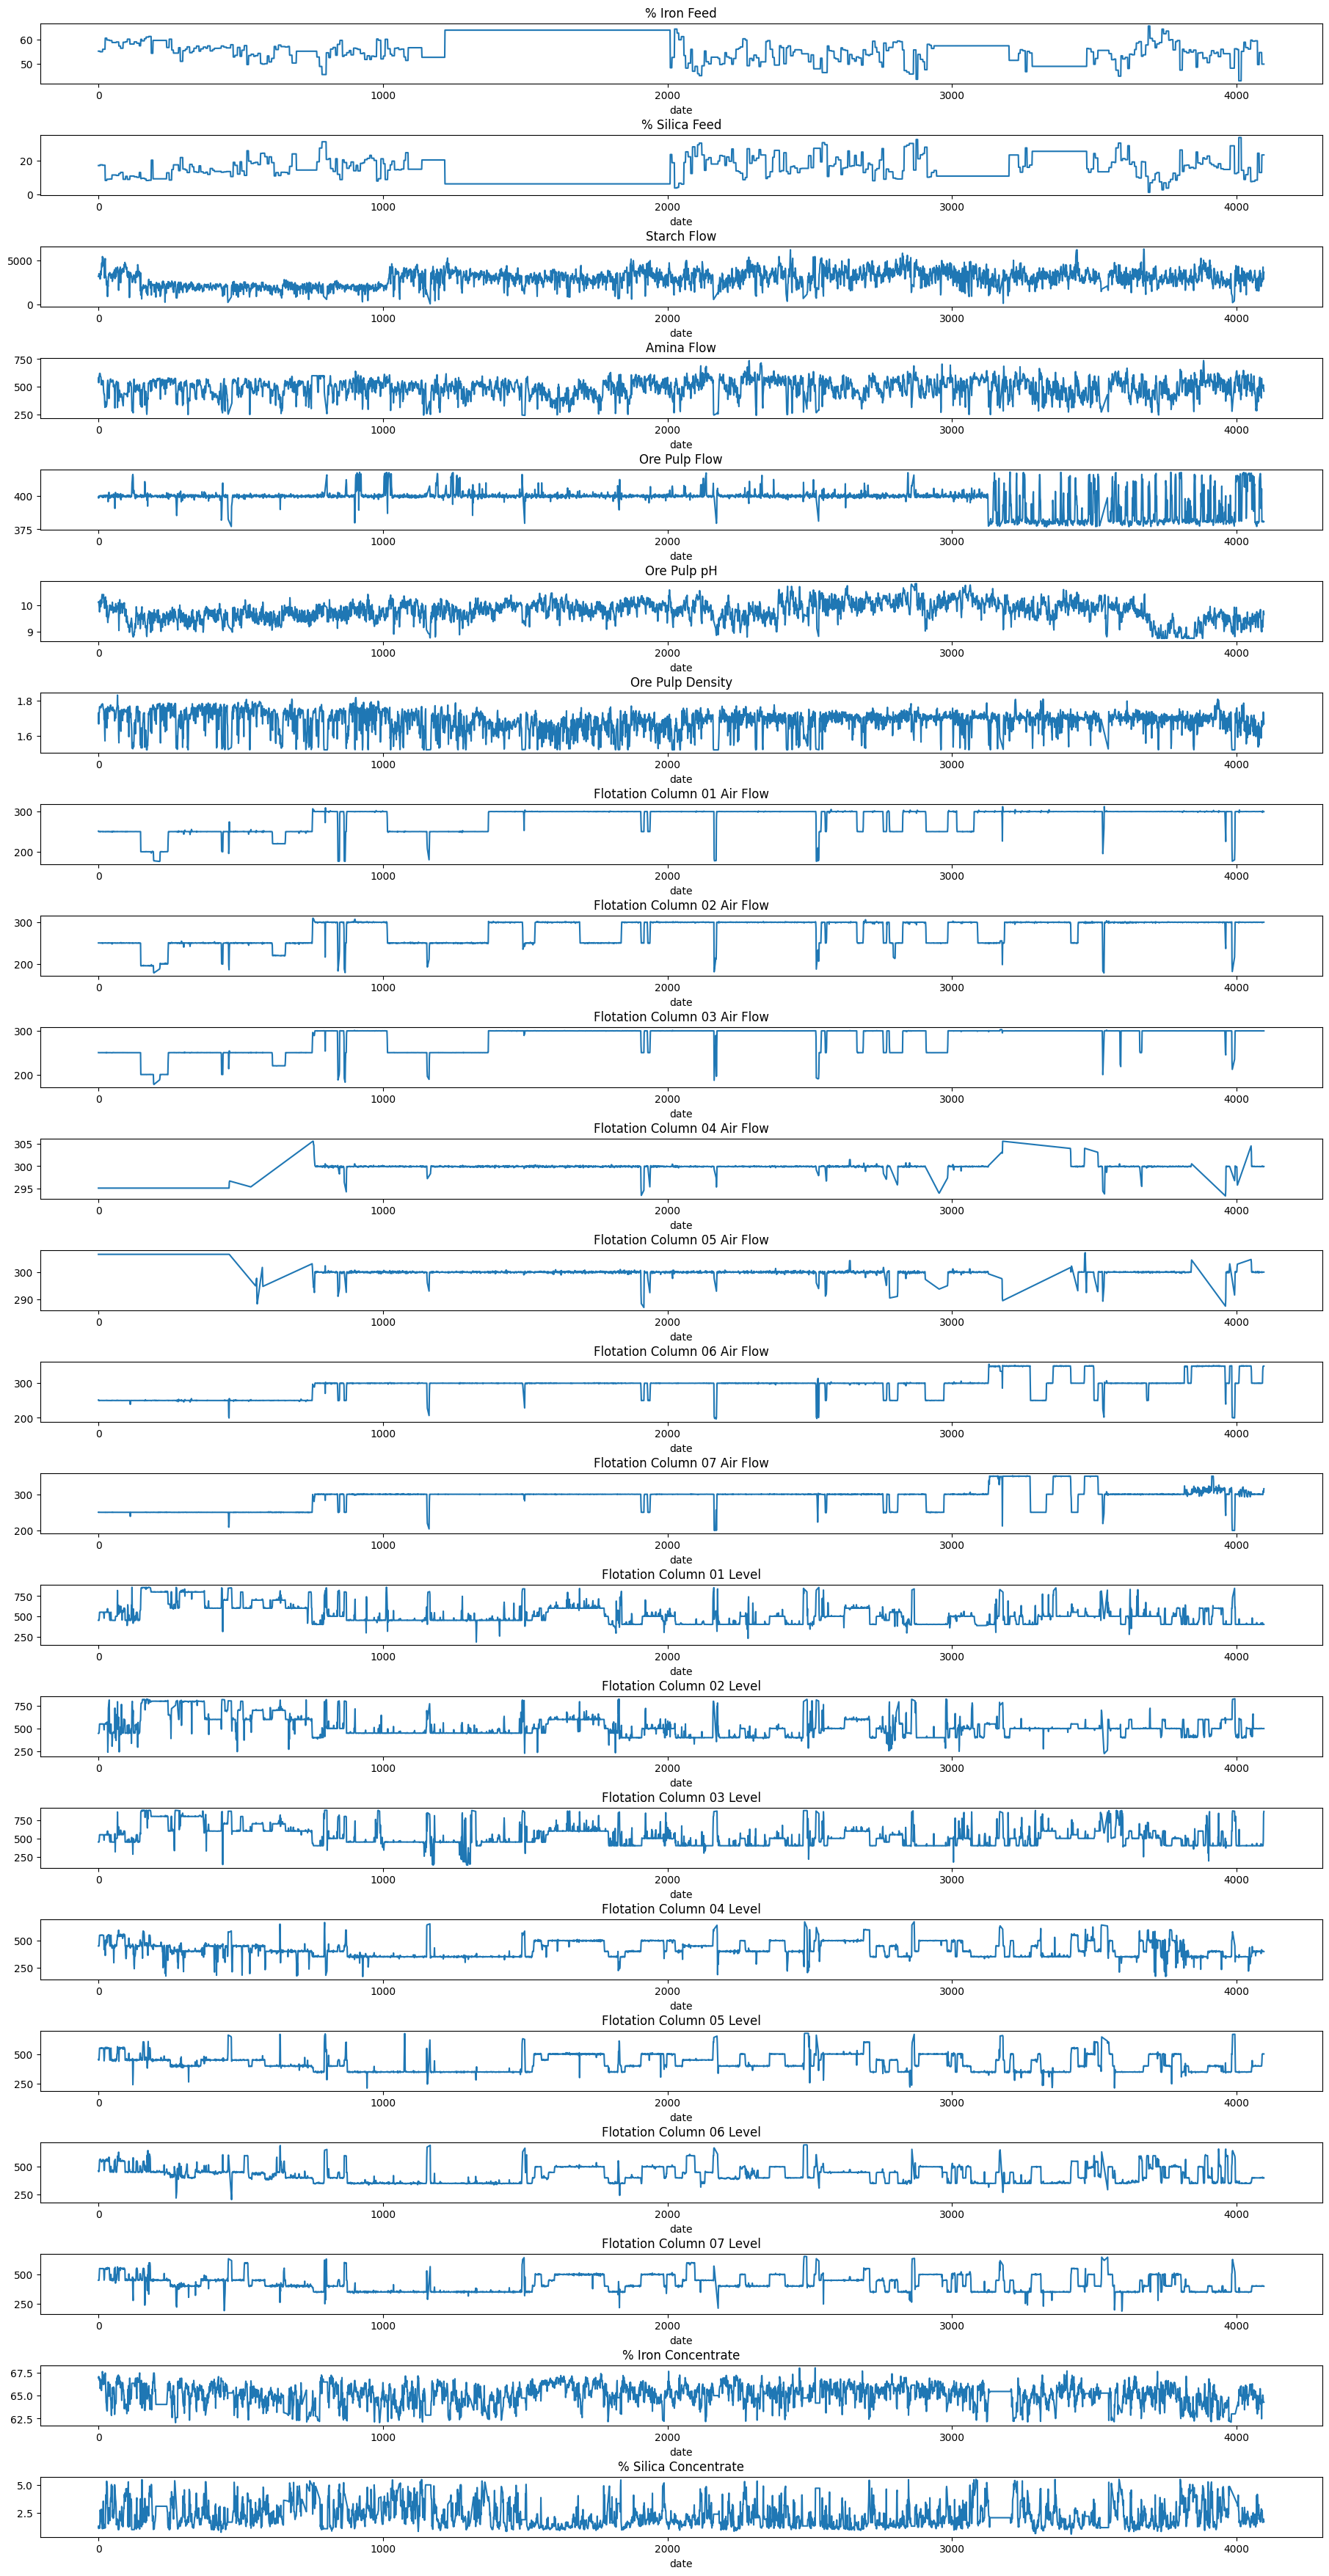

In [20]:
fig, axs = plt.subplots(23,1,figsize=(18, 35))
for i in range(0, len(resampled_data.columns)-1):
  axs[i].plot(resampled_data.iloc[:, i+1])
  axs[i].set_title(resampled_data.columns[i+1])
  axs[i].set_xlabel('date')
fig.tight_layout(pad=0.3)

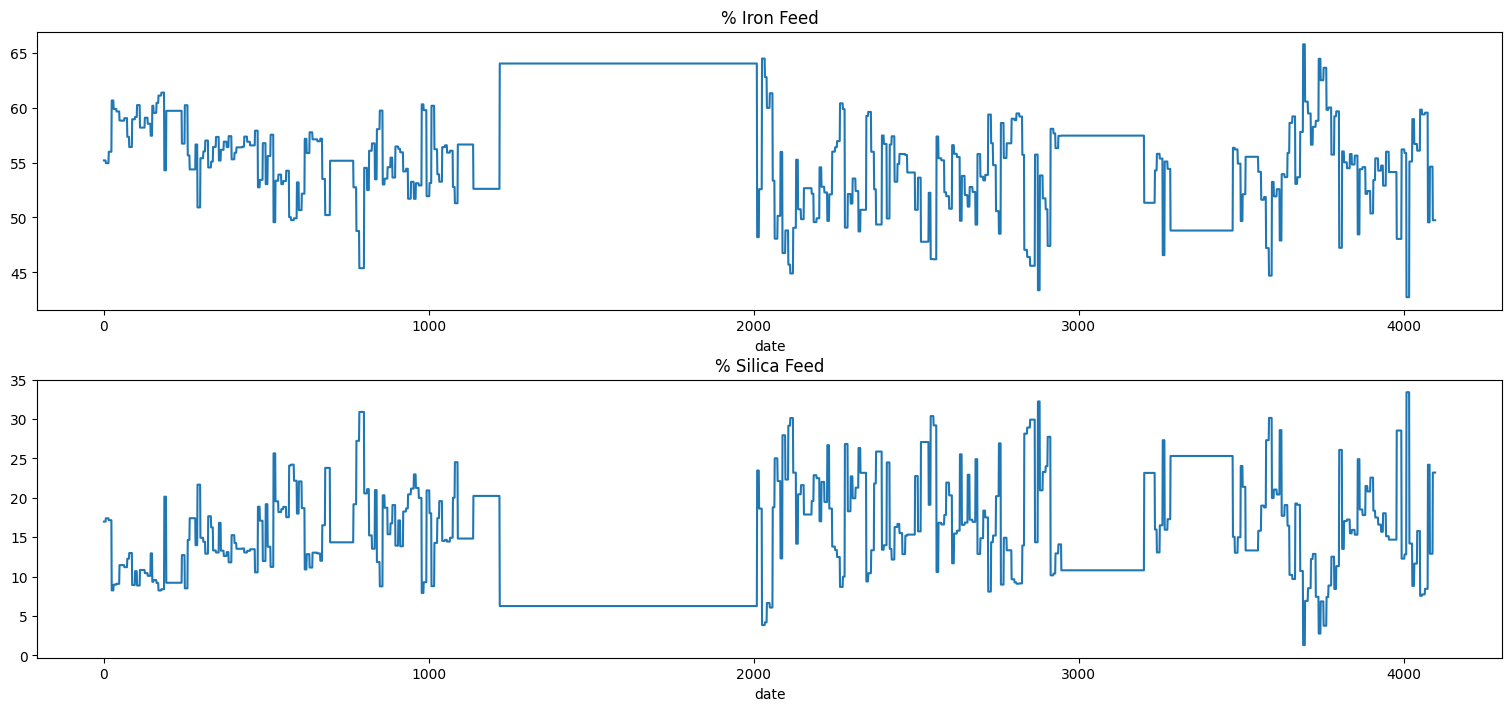

In [21]:
fig, axs = plt.subplots(2,1, figsize=(15, 7))
axs[0].plot(resampled_data.iloc[:, 1])
axs[0].set_title(resampled_data.columns[1])
axs[0].set_xlabel('date')

axs[1].plot(resampled_data.iloc[:, 2])
axs[1].set_title(resampled_data.columns[2])
axs[1].set_xlabel('date')

fig.tight_layout(pad=0.3)

In [22]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
X = resampled_data.iloc[:, 1:]
scaled_data = preprocessing.scale(X.T)

In [24]:
# Creating the pca and centering & normalizing the data
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: divide by zero encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: over

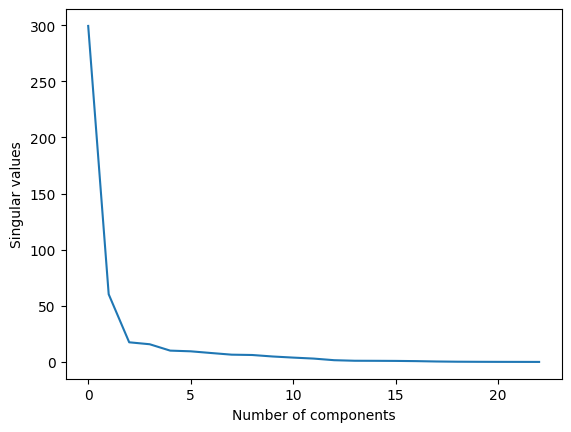

In [25]:
plt.figure()
plt.plot(pca.singular_values_)
plt.xlabel('Number of components')
plt.ylabel('Singular values')
plt.show()

In [26]:
# per_var contains the percentage of variance that each PC explains
per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(per_var)

[95.1  3.9  0.3  0.3  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0. ]


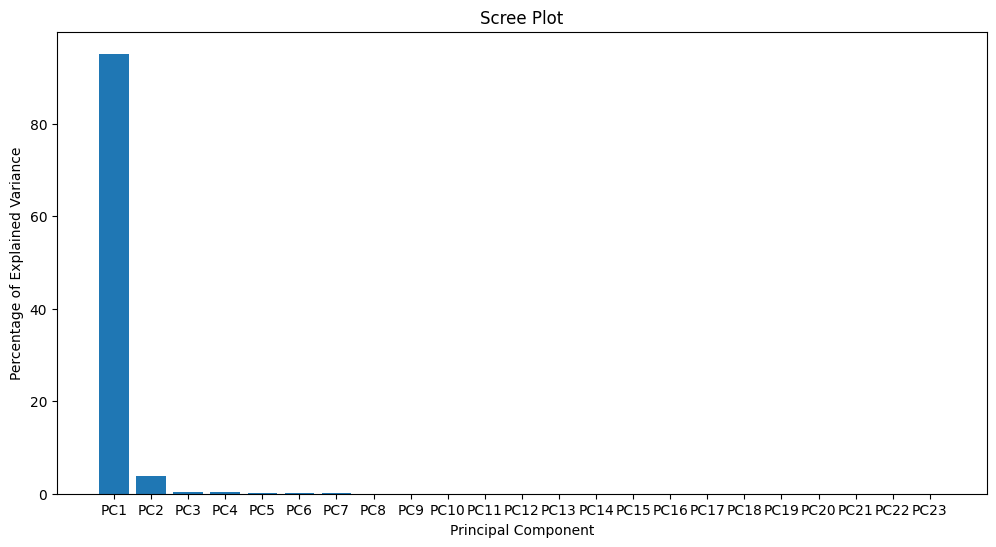

In [27]:
# this shows the amount of variance that each PC explains
plt.figure(figsize=(12, 6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

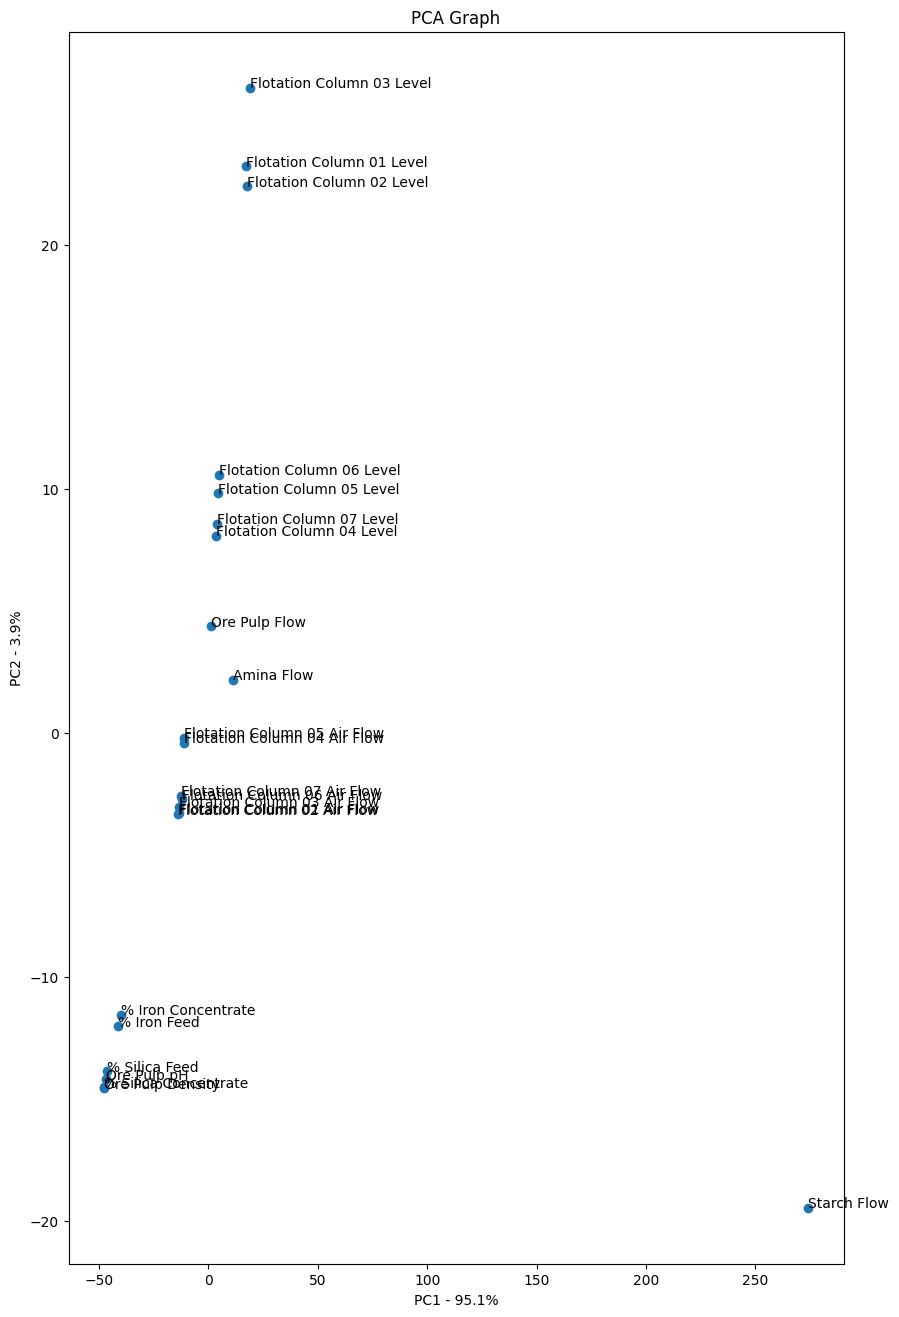

In [28]:
# This is the pca plot
# Each row in pca_data corresponds to a variable (column in X) and labels are the principal components
# Variables on the leftside correlate with each other, variables on the rightside correlate with each other
pca_df = pd.DataFrame(pca_data, index=X.columns, columns=labels)

# I only use the PC1 and PC2 for the plot because they seem to explain most of the variance
# PC1 explains 95.1% and PC2 explains 3.9%
# PC1 is the X axis so most important differences are on the X axis
plt.figure(figsize=(10, 16))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [29]:
loading_scores = pd.Series(pca_data[:,0], index=X.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_variables = sorted_loading_scores[0:20].index.values

print(loading_scores[top_10_variables])
# These loading scores tell which variables are the most important for PC1
# The higher the absolute value, the more important the variable is

Starch Flow                     274.231114
Ore Pulp Density                -47.816939
% Silica Concentrate            -47.733257
Ore Pulp pH                     -46.821606
% Silica Feed                   -46.204044
% Iron Feed                     -41.084009
% Iron Concentrate              -39.994211
Flotation Column 03 Level        18.888668
Flotation Column 02 Level        17.531780
Flotation Column 01 Level        17.328587
Flotation Column 02 Air Flow    -13.964831
Flotation Column 01 Air Flow    -13.598358
Flotation Column 03 Air Flow    -13.478478
Flotation Column 07 Air Flow    -12.321796
Flotation Column 06 Air Flow    -12.188836
Amina Flow                       11.379516
Flotation Column 04 Air Flow    -11.055707
Flotation Column 05 Air Flow    -10.977613
Flotation Column 06 Level         5.009367
Flotation Column 05 Level         4.337233
dtype: float64
